In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sys
sys.path.append('../modules/')
import model as m
import os

In [2]:
testing_folder_path = '../Images/Testing'

In [3]:
datagen = ImageDataGenerator()
test_ds = datagen.flow_from_directory(
    testing_folder_path,
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='categorical',
    seed=42,
    shuffle=False
)

Found 1311 images belonging to 4 classes.


In [4]:
true_classes = test_ds.classes

In [5]:
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Neural Network

In [6]:
model = keras.models.load_model('../Models/CNN_base.h5')

In [7]:
y_pred = model.predict(test_ds)
predicted_classes = np.argmax(y_pred, axis=1)

41/41 [==============================] - 14s 226ms/step


In [8]:
cm = m.confusion_matrix(true_classes, predicted_classes)

In [9]:
class_paths = {class_name: os.path.join(testing_folder_path, class_name) for class_name in class_names}

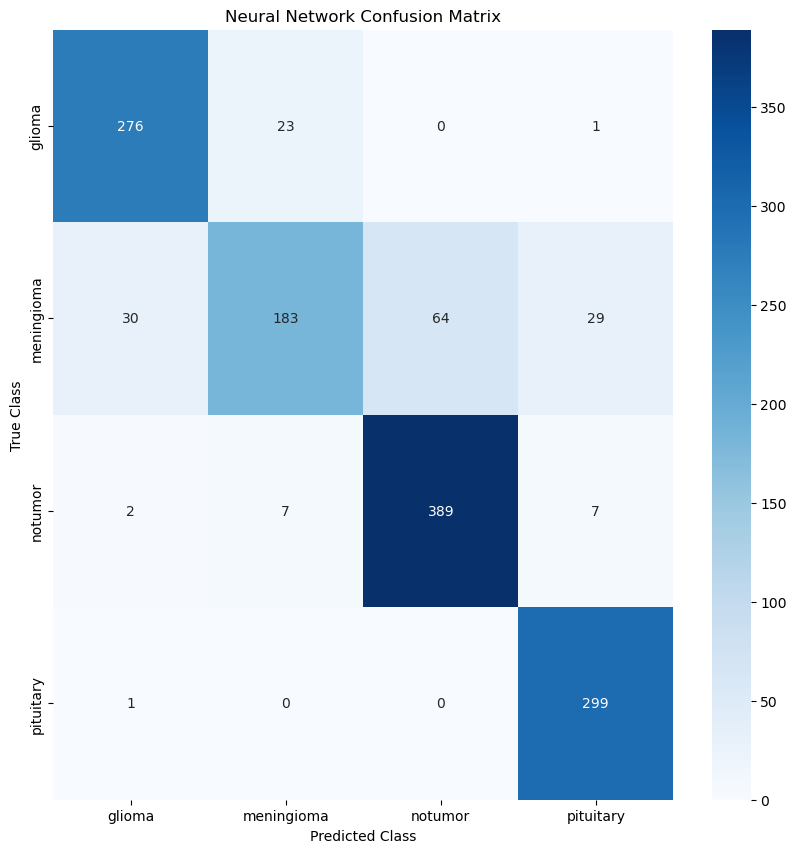

In [10]:
m.plot_confusion_matrix(cm, class_paths, 'Neural Network')

In [11]:
# Calculate metrics
CNN_df = m.model_metrics(true_classes, predicted_classes, 'Neural Network: No regularization')
CNN_df

,Accuracy,Precision,Recall,F1 Score
Neural Network: No regularization,0.874905,0.873843,0.874905,0.867297


## Neural network with regularization

In [12]:
model2 = keras.models.load_model('../Models/CNN_regularization.h5')

In [13]:
y_pred2 = model2.predict(test_ds)
predicted_classes2 = np.argmax(y_pred2, axis=1)

41/41 [==============================] - 8s 189ms/step


In [14]:
cm2 = m.confusion_matrix(true_classes, predicted_classes2)

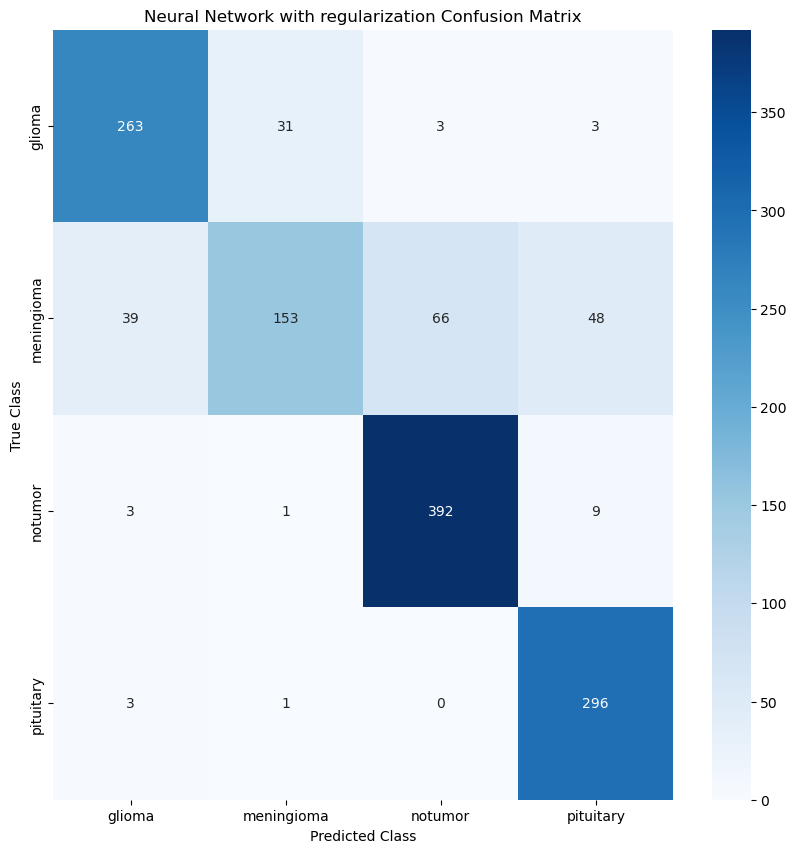

In [15]:
m.plot_confusion_matrix(cm2, class_paths, 'Neural Network with regularization')

In [16]:
# Calculate metrics
regularization_df = m.model_metrics(true_classes, predicted_classes2, 'Neural Network: With Regularization')
regularization_df

,Accuracy,Precision,Recall,F1 Score
Neural Network: With Regularization,0.842105,0.84035,0.842105,0.829321


# Saving metrics

In [17]:
df = pd.read_csv('./scores.csv', index_col=0 )

In [18]:
df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
baseline,0.46987,0.468308,0.46987,0.463567


In [19]:
df = pd.concat([df, CNN_df, regularization_df], axis = 0 )

In [20]:
df

,Accuracy,Precision,Recall,F1 Score
baseline,0.469870,0.468308,0.469870,0.463567
Neural Network: No regularization,0.874905,0.873843,0.874905,0.867297
Neural Network: With Regularization,0.842105,0.840350,0.842105,0.829321


In [21]:
df.to_csv('./scores.csv')

_______________________________________________________________________________________________________________________-
# Conclusion

When looking at additional metrics we have more insight on the different metrics on individual classifications. In this case we only want to focus only on the no tumor class in which case we want to limit our false negative, so the metric we will focus on is Precision. In this case our Neural network with no regularization does the best across all metrics. The only mis-classification for the no tumor class is meningioma in which case we see 64 false negatives.